In [0]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
energy=pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/daily_dataset/energy.csv')
#energy = pd.read_csv('energy.csv')
len(energy)

3536007

In [0]:
energy.head()

,Unnamed: 0,day,LCLid,energy_sum
0,0,2012-10-12,MAC000002,7.098
1,1,2012-10-13,MAC000002,11.087
2,2,2012-10-14,MAC000002,13.223
3,3,2012-10-15,MAC000002,10.257
4,4,2012-10-16,MAC000002,9.769


In [0]:
energy1=energy[['day','LCLid', 'energy_sum']]

In [0]:
energy1.head()

,day,LCLid,energy_sum
0,2012-10-12,MAC000002,7.098
1,2012-10-13,MAC000002,11.087
2,2012-10-14,MAC000002,13.223
3,2012-10-15,MAC000002,10.257
4,2012-10-16,MAC000002,9.769


In [0]:
households=pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/daily_dataset/informations_households.csv')

In [0]:
households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [0]:
households.loc[households.Acorn == 'ACORN-D'].head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
335,MAC004539,Std,ACORN-D,Affluent,block_6
336,MAC000336,ToU,ACORN-D,Affluent,block_6
337,MAC000342,ToU,ACORN-D,Affluent,block_6
338,MAC001698,Std,ACORN-D,Affluent,block_6
339,MAC000727,Std,ACORN-D,Affluent,block_6


In [0]:
#Tabla de Frecuencia de los Grupos de Acorn
pd.value_counts(households['Acorn_grouped'])

Affluent       2192
Adversity      1816
Comfortable    1507
ACORN-U          49
ACORN-            2
Name: Acorn_grouped, dtype: int64

In [0]:
household1=households[['LCLid', 'Acorn', 'Acorn_grouped']]

In [0]:
household1.head()

,LCLid,Acorn,Acorn_grouped
0,MAC005492,ACORN-,ACORN-
1,MAC001074,ACORN-,ACORN-
2,MAC000002,ACORN-A,Affluent
3,MAC003613,ACORN-A,Affluent
4,MAC003597,ACORN-A,Affluent


In [0]:
#Se unen las tablas energy1 y household1
allblockhousehold=pd.merge(energy1, household1, how ='left', on ='LCLid') 

In [0]:
allblockhousehold.head()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
0,2012-10-12,MAC000002,7.098,ACORN-A,Affluent
1,2012-10-13,MAC000002,11.087,ACORN-A,Affluent
2,2012-10-14,MAC000002,13.223,ACORN-A,Affluent
3,2012-10-15,MAC000002,10.257,ACORN-A,Affluent
4,2012-10-16,MAC000002,9.769,ACORN-A,Affluent


In [0]:
allblockhousehold.tail()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
3536002,2014-02-24,MAC004828,2.587,ACORN-U,ACORN-U
3536003,2014-02-25,MAC004828,0.720,ACORN-U,ACORN-U
3536004,2014-02-26,MAC004828,1.051,ACORN-U,ACORN-U
3536005,2014-02-27,MAC004828,0.736,ACORN-U,ACORN-U
3536006,2014-02-28,MAC004828,0.000,ACORN-U,ACORN-U


In [0]:
len(allblockhousehold)

3536007

In [0]:
allblockhousehold['day']=pd.to_datetime(allblockhousehold['day'])

In [0]:
allblockhousehold.head()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
0,2012-10-12,MAC000002,7.098,ACORN-A,Affluent
1,2012-10-13,MAC000002,11.087,ACORN-A,Affluent
2,2012-10-14,MAC000002,13.223,ACORN-A,Affluent
3,2012-10-15,MAC000002,10.257,ACORN-A,Affluent
4,2012-10-16,MAC000002,9.769,ACORN-A,Affluent


In [0]:
#Se realiza una agrupacion por Acorn_Group para separar Afluentes, Confortables y Adversity
acorn=allblockhousehold.groupby('Acorn_grouped')

In [0]:
#Buscar 100 Casas que sean caracterizadas como Comfortable y obtener el consumo energético agregado
confortable=acorn.get_group('Comfortable')

In [0]:
confortable.head()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
1414652,2012-05-03,MAC001028,10.129,ACORN-F,Comfortable
1414653,2012-05-04,MAC001028,11.307,ACORN-F,Comfortable
1414654,2012-05-05,MAC001028,10.093,ACORN-F,Comfortable
1414655,2012-05-06,MAC001028,12.314,ACORN-F,Comfortable
1414656,2012-05-07,MAC001028,10.669,ACORN-F,Comfortable


In [0]:
len(confortable['LCLid'].unique())

1507

In [0]:
len(confortable)

937069

In [0]:
confortable.set_index('day', inplace=True)

In [0]:
confortable.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2012-05-03,MAC001028,10.129,ACORN-F,Comfortable
2012-05-04,MAC001028,11.307,ACORN-F,Comfortable
2012-05-05,MAC001028,10.093,ACORN-F,Comfortable
2012-05-06,MAC001028,12.314,ACORN-F,Comfortable
2012-05-07,MAC001028,10.669,ACORN-F,Comfortable


In [0]:
confortable2=confortable["2013-01-01":"2013-12-31"]

In [0]:
confortable2=confortable["2012-01-01"]

In [0]:
confortable2.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2012-01-01,MAC000125,3.251,ACORN-F,Comfortable
2012-01-01,MAC000243,17.796,ACORN-F,Comfortable
2012-01-01,MAC000244,7.163,ACORN-F,Comfortable
2012-01-01,MAC000248,25.205,ACORN-F,Comfortable
2012-01-01,MAC000262,20.716,ACORN-F,Comfortable


In [0]:
len(confortable2)

114

In [0]:
c=list(confortable2['LCLid'].unique())

In [0]:
confortableok = confortable[confortable.LCLid.isin(c)]
confortableok.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2011-12-15,MAC000125,9.591,ACORN-F,Comfortable
2011-12-16,MAC000125,13.889,ACORN-F,Comfortable
2011-12-17,MAC000125,24.136,ACORN-F,Comfortable
2011-12-18,MAC000125,15.833,ACORN-F,Comfortable
2011-12-19,MAC000125,12.508,ACORN-F,Comfortable


In [0]:
len(confortableok['LCLid'].unique())

114

In [0]:
table_confortableok = pd.pivot_table(confortableok, index=['day'], values='energy_sum',  columns=['LCLid'])

In [0]:
table_confortableok.head()

LCLid,MAC000020,MAC000027,MAC000039,MAC000043,MAC000044,MAC000051,MAC000053,MAC000059,MAC000060,MAC000062,MAC000069,MAC000070,MAC000071,MAC000074,MAC000083,MAC000089,MAC000091,MAC000093,MAC000094,MAC000097,MAC000098,MAC000108,MAC000118,MAC000124,MAC000125,MAC000128,MAC000137,MAC000143,MAC000145,MAC000147,MAC000148,MAC000149,MAC000151,MAC000156,MAC000157,MAC000158,MAC000160,MAC000163,MAC000167,MAC000170,...,MAC000254,MAC000259,MAC000260,MAC000261,MAC000262,MAC000265,MAC000271,MAC000272,MAC004456,MAC004457,MAC004460,MAC004466,MAC004472,MAC004478,MAC004483,MAC004484,MAC004485,MAC004488,MAC004491,MAC004492,MAC004494,MAC004499,MAC004501,MAC004502,MAC004506,MAC004521,MAC004523,MAC004526,MAC004542,MAC004545,MAC004551,MAC004557,MAC004572,MAC004578,MAC004580,MAC004845,MAC004850,MAC004859,MAC004862,MAC004867
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.952,3.036,1.283,2.287,3.273,6.523,7.408,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.135,7.489,2.304,4.331,4.620,12.689,14.258,3.181,3.957,7.758,1.138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.720,6.185,2.324,4.373,4.783,10.717,14.818,3.467,9.982,11.359,0.582,12.876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.234,6.964,2.295,4.335,4.935,12.442,11.265,2.815,11.524,19.174,0.537,15.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.189,7.912,2.302,4.375,4.553,12.964,12.328,3.638,11.897,22.100,1.375,12.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Quita todas las filas donde hay valores nulos
table_confortableok2=table_confortableok.dropna(axis='columns', how="all")

In [0]:
table_confortableok2.head()

LCLid,MAC000020,MAC000027,MAC000039,MAC000043,MAC000044,MAC000051,MAC000053,MAC000059,MAC000060,MAC000062,MAC000069,MAC000070,MAC000071,MAC000074,MAC000083,MAC000089,MAC000091,MAC000093,MAC000094,MAC000097,MAC000098,MAC000108,MAC000118,MAC000124,MAC000125,MAC000128,MAC000137,MAC000143,MAC000145,MAC000147,MAC000148,MAC000149,MAC000151,MAC000156,MAC000157,MAC000158,MAC000160,MAC000163,MAC000167,MAC000170,...,MAC000254,MAC000259,MAC000260,MAC000261,MAC000262,MAC000265,MAC000271,MAC000272,MAC004456,MAC004457,MAC004460,MAC004466,MAC004472,MAC004478,MAC004483,MAC004484,MAC004485,MAC004488,MAC004491,MAC004492,MAC004494,MAC004499,MAC004501,MAC004502,MAC004506,MAC004521,MAC004523,MAC004526,MAC004542,MAC004545,MAC004551,MAC004557,MAC004572,MAC004578,MAC004580,MAC004845,MAC004850,MAC004859,MAC004862,MAC004867
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.952,3.036,1.283,2.287,3.273,6.523,7.408,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.135,7.489,2.304,4.331,4.620,12.689,14.258,3.181,3.957,7.758,1.138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.720,6.185,2.324,4.373,4.783,10.717,14.818,3.467,9.982,11.359,0.582,12.876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.234,6.964,2.295,4.335,4.935,12.442,11.265,2.815,11.524,19.174,0.537,15.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.189,7.912,2.302,4.375,4.553,12.964,12.328,3.638,11.897,22.100,1.375,12.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
confortable_interpolate=table_confortableok2.interpolate(method="time", limit_direction='both')

In [0]:
confortable_interpolate.head()

LCLid,MAC000020,MAC000027,MAC000039,MAC000043,MAC000044,MAC000051,MAC000053,MAC000059,MAC000060,MAC000062,MAC000069,MAC000070,MAC000071,MAC000074,MAC000083,MAC000089,MAC000091,MAC000093,MAC000094,MAC000097,MAC000098,MAC000108,MAC000118,MAC000124,MAC000125,MAC000128,MAC000137,MAC000143,MAC000145,MAC000147,MAC000148,MAC000149,MAC000151,MAC000156,MAC000157,MAC000158,MAC000160,MAC000163,MAC000167,MAC000170,...,MAC000254,MAC000259,MAC000260,MAC000261,MAC000262,MAC000265,MAC000271,MAC000272,MAC004456,MAC004457,MAC004460,MAC004466,MAC004472,MAC004478,MAC004483,MAC004484,MAC004485,MAC004488,MAC004491,MAC004492,MAC004494,MAC004499,MAC004501,MAC004502,MAC004506,MAC004521,MAC004523,MAC004526,MAC004542,MAC004545,MAC004551,MAC004557,MAC004572,MAC004578,MAC004580,MAC004845,MAC004850,MAC004859,MAC004862,MAC004867
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,8.952,3.036,1.283,2.287,3.273,6.523,7.408,3.181,3.957,7.758,1.138,12.876,...,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,5.691,4.188,1.266,2.211,2.904,8.615,11.828,5.845,3.791,3.554,3.454,11.202,4.766,2.517
2011-11-24,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,12.135,7.489,2.304,4.331,4.620,12.689,14.258,3.181,3.957,7.758,1.138,12.876,...,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,5.691,4.188,1.266,2.211,2.904,8.615,11.828,5.845,3.791,3.554,3.454,11.202,4.766,2.517
2011-11-25,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.720,6.185,2.324,4.373,4.783,10.717,14.818,3.467,9.982,11.359,0.582,12.876,...,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,5.691,4.188,1.266,2.211,2.904,8.615,11.828,5.845,3.791,3.554,3.454,11.202,4.766,2.517
2011-11-26,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,15.234,6.964,2.295,4.335,4.935,12.442,11.265,2.815,11.524,19.174,0.537,15.002,...,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,5.691,4.188,1.266,2.211,2.904,8.615,11.828,5.845,3.791,3.554,3.454,11.202,4.766,2.517
2011-11-27,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.189,7.912,2.302,4.375,4.553,12.964,12.328,3.638,11.897,22.100,1.375,12.800,...,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,5.691,4.188,1.266,2.211,2.904,8.615,11.828,5.845,3.791,3.554,3.454,11.202,4.766,2.517


In [0]:
df2 = confortable_interpolate.iloc[:,0:100]

In [0]:
df2.head()

LCLid,MAC000020,MAC000027,MAC000039,MAC000043,MAC000044,MAC000051,MAC000053,MAC000059,MAC000060,MAC000062,MAC000069,MAC000070,MAC000071,MAC000074,MAC000083,MAC000089,MAC000091,MAC000093,MAC000094,MAC000097,MAC000098,MAC000108,MAC000118,MAC000124,MAC000125,MAC000128,MAC000137,MAC000143,MAC000145,MAC000147,MAC000148,MAC000149,MAC000151,MAC000156,MAC000157,MAC000158,MAC000160,MAC000163,MAC000167,MAC000170,...,MAC000226,MAC000229,MAC000232,MAC000238,MAC000239,MAC000240,MAC000241,MAC000243,MAC000244,MAC000247,MAC000248,MAC000250,MAC000251,MAC000252,MAC000254,MAC000259,MAC000260,MAC000261,MAC000262,MAC000265,MAC000271,MAC000272,MAC004456,MAC004457,MAC004460,MAC004466,MAC004472,MAC004478,MAC004483,MAC004484,MAC004485,MAC004488,MAC004491,MAC004492,MAC004494,MAC004499,MAC004501,MAC004502,MAC004506,MAC004521
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,8.952,3.036,1.283,2.287,3.273,6.523,7.408,3.181,3.957,7.758,1.138,12.876,...,6.282,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073
2011-11-24,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,12.135,7.489,2.304,4.331,4.620,12.689,14.258,3.181,3.957,7.758,1.138,12.876,...,6.282,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073
2011-11-25,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.720,6.185,2.324,4.373,4.783,10.717,14.818,3.467,9.982,11.359,0.582,12.876,...,6.282,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073
2011-11-26,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,15.234,6.964,2.295,4.335,4.935,12.442,11.265,2.815,11.524,19.174,0.537,15.002,...,6.282,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073
2011-11-27,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.189,7.912,2.302,4.375,4.553,12.964,12.328,3.638,11.897,22.100,1.375,12.800,...,6.282,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073


In [0]:
df2['consumo_agregado'] = df2.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2.head()

LCLid,MAC000020,MAC000027,MAC000039,MAC000043,MAC000044,MAC000051,MAC000053,MAC000059,MAC000060,MAC000062,MAC000069,MAC000070,MAC000071,MAC000074,MAC000083,MAC000089,MAC000091,MAC000093,MAC000094,MAC000097,MAC000098,MAC000108,MAC000118,MAC000124,MAC000125,MAC000128,MAC000137,MAC000143,MAC000145,MAC000147,MAC000148,MAC000149,MAC000151,MAC000156,MAC000157,MAC000158,MAC000160,MAC000163,MAC000167,MAC000170,...,MAC000229,MAC000232,MAC000238,MAC000239,MAC000240,MAC000241,MAC000243,MAC000244,MAC000247,MAC000248,MAC000250,MAC000251,MAC000252,MAC000254,MAC000259,MAC000260,MAC000261,MAC000262,MAC000265,MAC000271,MAC000272,MAC004456,MAC004457,MAC004460,MAC004466,MAC004472,MAC004478,MAC004483,MAC004484,MAC004485,MAC004488,MAC004491,MAC004492,MAC004494,MAC004499,MAC004501,MAC004502,MAC004506,MAC004521,consumo_agregado
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,8.952,3.036,1.283,2.287,3.273,6.523,7.408,3.181,3.957,7.758,1.138,12.876,...,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,794.949
2011-11-24,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,12.135,7.489,2.304,4.331,4.620,12.689,14.258,3.181,3.957,7.758,1.138,12.876,...,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,820.013
2011-11-25,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.720,6.185,2.324,4.373,4.783,10.717,14.818,3.467,9.982,11.359,0.582,12.876,...,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,828.463
2011-11-26,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,15.234,6.964,2.295,4.335,4.935,12.442,11.265,2.815,11.524,19.174,0.537,15.002,...,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,839.799
2011-11-27,6.153,3.997,10.188,2.197,5.379,3.801,9.534,12.781,10.6,7.568,5.611,5.582,14.128,12.625,17.585,9.391,4.723,3.932,4.877,8.497,8.611,3.053,6.931,8.499,9.591,3.495,7.371,8.864,13.189,7.912,2.302,4.375,4.553,12.964,12.328,3.638,11.897,22.100,1.375,12.800,...,3.598,1.185,9.453,4.972,12.07,6.099,15.343,2.97,12.865,11.541,4.156,9.336,15.646,20.645,9.359,5.537,4.984,10.001,7.428,6.863,11.419,23.696,3.971,9.98,28.143,16.467,13.989,10.956,22.25,5.967,7.929,8.037,5.347,10.073,8.531,12.213,11.061,4.297,7.073,837.558


In [0]:
df2.shape

(829, 101)

In [0]:
#Buscar 100 Casas que sean caracterizadas como Afluentes y obtener el consumo energético agregado
afluentes=acorn.get_group('Affluent')

In [0]:
afluentes.head()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
0,2012-10-12,MAC000002,7.098,ACORN-A,Affluent
1,2012-10-13,MAC000002,11.087,ACORN-A,Affluent
2,2012-10-14,MAC000002,13.223,ACORN-A,Affluent
3,2012-10-15,MAC000002,10.257,ACORN-A,Affluent
4,2012-10-16,MAC000002,9.769,ACORN-A,Affluent


In [0]:
len(afluentes['LCLid'].unique())

2192

In [0]:
len(afluentes)

1432485

In [0]:
afluentes.set_index('day', inplace=True)

In [0]:
afluentes.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2012-10-12,MAC000002,7.098,ACORN-A,Affluent
2012-10-13,MAC000002,11.087,ACORN-A,Affluent
2012-10-14,MAC000002,13.223,ACORN-A,Affluent
2012-10-15,MAC000002,10.257,ACORN-A,Affluent
2012-10-16,MAC000002,9.769,ACORN-A,Affluent


In [0]:
afluentes2=afluentes["2012-01-01"]

In [0]:
afluentes2.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2012-01-01,MAC000246,22.556,ACORN-A,Affluent
2012-01-01,MAC000246,22.556,ACORN-A,Affluent
2012-01-01,MAC004529,7.467,ACORN-A,Affluent
2012-01-01,MAC000030,18.245,ACORN-A,Affluent
2012-01-01,MAC000040,24.629,ACORN-A,Affluent


In [0]:
len(afluentes2)

168

In [0]:
a=list(afluentes2['LCLid'].unique())

In [0]:
Afluentesok = afluentes[afluentes.LCLid.isin(a)]
Afluentesok.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2011-12-03,MAC000246,9.007,ACORN-A,Affluent
2011-12-04,MAC000246,20.763,ACORN-A,Affluent
2011-12-05,MAC000246,6.020,ACORN-A,Affluent
2011-12-06,MAC000246,13.322,ACORN-A,Affluent
2011-12-07,MAC000246,9.062,ACORN-A,Affluent


In [0]:
len(Afluentesok['LCLid'].unique())

167

In [0]:
table_Afluentesok = pd.pivot_table(Afluentesok,index=['day'], values='energy_sum',  columns=['LCLid'])

In [0]:
table_Afluentesok.head()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC004529,MAC004531,MAC004534,MAC004535,MAC004536,MAC004537,MAC004538,MAC004539,MAC004543,MAC004548,MAC004549,MAC004552,MAC004553,MAC004554,MAC004555,MAC004556,MAC004560,MAC004561,MAC004562,MAC004564,MAC004565,MAC004567,MAC004571,MAC004574,MAC004579,MAC004581,MAC004584,MAC004846,MAC004848,MAC004849,MAC004851,MAC004852,MAC004854,MAC004855,MAC004856,MAC004857,MAC004858,MAC004863,MAC004864,MAC005555
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
table_Afluentesok.shape

(829, 167)

In [0]:
#Saber que columnas del dataset tienen valores nulos en sus celdas
null_columns=table_Afluentesok.columns[table_Afluentesok.isnull().any()]
null_columns

Index(['MAC000015', 'MAC000017', 'MAC000018', 'MAC000021', 'MAC000024',
       'MAC000026', 'MAC000028', 'MAC000030', 'MAC000033', 'MAC000034',
       ...
       'MAC004851', 'MAC004852', 'MAC004854', 'MAC004855', 'MAC004856',
       'MAC004857', 'MAC004858', 'MAC004863', 'MAC004864', 'MAC005555'],
      dtype='object', name='LCLid', length=163)

In [0]:
#Quita todas las filas donde hay valores nulos
table_Afluentesok2=table_Afluentesok.dropna(axis='columns', how="all")

In [0]:
table_Afluentesok2.head()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC004529,MAC004531,MAC004534,MAC004535,MAC004536,MAC004537,MAC004538,MAC004539,MAC004543,MAC004548,MAC004549,MAC004552,MAC004553,MAC004554,MAC004555,MAC004556,MAC004560,MAC004561,MAC004562,MAC004564,MAC004565,MAC004567,MAC004571,MAC004574,MAC004579,MAC004581,MAC004584,MAC004846,MAC004848,MAC004849,MAC004851,MAC004852,MAC004854,MAC004855,MAC004856,MAC004857,MAC004858,MAC004863,MAC004864,MAC005555
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
table_Afluentesok2.tail()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC004529,MAC004531,MAC004534,MAC004535,MAC004536,MAC004537,MAC004538,MAC004539,MAC004543,MAC004548,MAC004549,MAC004552,MAC004553,MAC004554,MAC004555,MAC004556,MAC004560,MAC004561,MAC004562,MAC004564,MAC004565,MAC004567,MAC004571,MAC004574,MAC004579,MAC004581,MAC004584,MAC004846,MAC004848,MAC004849,MAC004851,MAC004852,MAC004854,MAC004855,MAC004856,MAC004857,MAC004858,MAC004863,MAC004864,MAC005555
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-24,9.909,7.770,5.419,26.421,33.108,18.051,NaN,13.491,6.906,52.157,25.191,2.660,0.02,36.204,21.382,9.491,34.184,NaN,9.418,8.206,3.401,NaN,5.764,8.664,5.424,3.369,1.681,12.628,4.267,24.892,NaN,0.934,12.876,8.468,9.100,14.555,NaN,10.450,NaN,NaN,...,9.307,10.459,3.397,5.300,NaN,11.748,NaN,5.508,18.191,NaN,40.929,11.513,8.900,11.528,6.427,6.034,NaN,18.618,26.606,2.673,17.801,12.117,9.972,12.507,2.391,11.977,1.428,NaN,8.735,4.628,12.450,31.735,NaN,6.313,7.658,9.967,42.918,13.643,5.790,10.290
2014-02-25,7.222,10.823,5.430,23.728,34.518,16.087,NaN,7.954,6.726,50.427,17.991,2.864,0.00,30.009,18.756,11.511,29.329,NaN,6.566,9.154,3.294,NaN,9.015,8.042,5.230,2.715,1.707,14.779,6.252,30.415,NaN,5.911,13.209,6.922,7.653,14.030,NaN,24.452,NaN,NaN,...,8.657,9.719,3.251,5.022,NaN,10.647,NaN,6.468,24.612,NaN,41.910,10.391,8.744,10.754,6.266,6.348,NaN,22.173,28.469,3.841,15.290,9.306,14.901,13.117,2.101,10.796,1.456,NaN,5.961,4.251,8.751,32.829,NaN,10.427,7.746,8.681,36.644,19.816,6.457,6.525
2014-02-26,9.064,7.387,7.495,25.109,24.740,21.225,NaN,8.670,7.998,48.320,24.313,2.084,0.00,32.385,18.556,4.605,42.057,NaN,6.674,9.286,3.852,NaN,10.499,7.800,2.802,5.875,11.336,13.423,9.546,21.459,NaN,0.878,12.686,22.617,8.089,13.820,NaN,27.214,NaN,NaN,...,7.273,12.830,3.603,5.209,NaN,11.489,NaN,5.619,23.138,NaN,46.624,7.885,12.573,12.829,4.951,5.504,NaN,13.752,29.491,3.798,17.740,12.749,9.284,10.229,1.964,10.371,1.500,NaN,5.552,5.071,9.016,27.193,NaN,8.673,7.615,12.762,39.141,22.920,7.824,5.053
2014-02-27,8.418,7.337,9.304,20.966,19.810,15.440,NaN,8.986,6.441,50.466,32.483,3.199,0.00,27.769,23.937,9.011,33.403,NaN,5.588,8.357,3.228,NaN,9.593,8.332,6.497,3.786,28.677,16.141,3.673,27.772,NaN,1.078,13.144,17.103,9.929,13.387,NaN,31.844,NaN,NaN,...,7.278,9.106,3.330,5.100,NaN,10.669,NaN,4.301,20.013,NaN,41.462,6.993,11.655,12.322,6.451,5.388,NaN,16.604,31.121,3.593,15.799,11.760,16.377,9.667,1.973,10.178,1.515,NaN,5.429,8.315,14.355,26.442,NaN,4.535,7.211,9.259,24.827,20.922,6.034,5.172
2014-02-28,0.097,0.336,0.380,0.737,2.118,0.272,NaN,0.078,0.253,5.690,0.551,0.010,0.00,0.456,0.123,0.084,1.025,NaN,0.108,0.145,0.023,NaN,0.063,0.171,0.049,0.084,0.735,0.134,0.068,0.744,NaN,0.013,0.217,0.412,0.389,0.173,NaN,0.735,NaN,NaN,...,0.239,0.240,0.047,0.076,NaN,0.139,NaN,0.022,0.398,NaN,0.967,0.047,0.385,0.100,0.212,0.097,NaN,0.033,1.238,0.063,0.300,0.054,0.623,0.148,0.024,0.137,0.014,NaN,0.027,0.086,0.300,1.413,NaN,0.132,0.294,0.351,0.229,2.013,0.201,0.086


In [0]:
afluentes_interpolate=table_Afluentesok2.interpolate(method="time", limit_direction='both')

In [0]:
afluentes_interpolate.head()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC004529,MAC004531,MAC004534,MAC004535,MAC004536,MAC004537,MAC004538,MAC004539,MAC004543,MAC004548,MAC004549,MAC004552,MAC004553,MAC004554,MAC004555,MAC004556,MAC004560,MAC004561,MAC004562,MAC004564,MAC004565,MAC004567,MAC004571,MAC004574,MAC004579,MAC004581,MAC004584,MAC004846,MAC004848,MAC004849,MAC004851,MAC004852,MAC004854,MAC004855,MAC004856,MAC004857,MAC004858,MAC004863,MAC004864,MAC005555
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,6.202,2.581,2.545,4.481,5.066,9.774,6.819,6.408,9.726,21.093,31.231,17.472,3.224,13.349,7.726,4.69,7.205,6.676,22.919,1.493,17.455,4.993,6.551,8.435,3.558,8.15,3.475,4.984,6.829,3.743,6.673,11.297,2.999,10.282,5.186,8.174,7.622,4.347,6.813,4.377
2011-11-24,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,6.202,2.581,2.545,4.481,5.066,9.774,6.819,6.408,9.726,21.093,31.231,17.472,3.224,13.349,7.726,4.69,7.205,6.676,22.919,1.493,17.455,4.993,6.551,8.435,3.558,8.15,3.475,4.984,6.829,3.743,6.673,11.297,2.999,10.282,5.186,8.174,7.622,4.347,6.813,4.377
2011-11-25,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,6.202,2.581,2.545,4.481,5.066,9.774,6.819,6.408,9.726,21.093,31.231,17.472,3.224,13.349,7.726,4.69,7.205,6.676,22.919,1.493,17.455,4.993,6.551,8.435,3.558,8.15,3.475,4.984,6.829,3.743,6.673,11.297,2.999,10.282,5.186,8.174,7.622,4.347,6.813,4.377
2011-11-26,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,6.202,2.581,2.545,4.481,5.066,9.774,6.819,6.408,9.726,21.093,31.231,17.472,3.224,13.349,7.726,4.69,7.205,6.676,22.919,1.493,17.455,4.993,6.551,8.435,3.558,8.15,3.475,4.984,6.829,3.743,6.673,11.297,2.999,10.282,5.186,8.174,7.622,4.347,6.813,4.377
2011-11-27,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,6.202,2.581,2.545,4.481,5.066,9.774,6.819,6.408,9.726,21.093,31.231,17.472,3.224,13.349,7.726,4.69,7.205,6.676,22.919,1.493,17.455,4.993,6.551,8.435,3.558,8.15,3.475,4.984,6.829,3.743,6.673,11.297,2.999,10.282,5.186,8.174,7.622,4.347,6.813,4.377


In [0]:
df1 = afluentes_interpolate.iloc[:,0:100]

In [0]:
df1.head()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC000159,MAC000161,MAC000164,MAC000165,MAC000168,MAC000169,MAC000172,MAC000173,MAC000175,MAC000176,MAC000179,MAC000181,MAC000182,MAC000186,MAC000189,MAC000191,MAC000193,MAC000194,MAC000203,MAC000205,MAC000214,MAC000218,MAC000219,MAC000220,MAC000221,MAC000224,MAC000228,MAC000234,MAC000235,MAC000237,MAC000242,MAC000246,MAC000253,MAC000257,MAC000263,MAC000264,MAC000270,MAC000273,MAC000274,MAC004455
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-30,6.661,9.999,10.748,24.314,32.797,6.444,5.828,22.776,6.895,43.236,24.312,2.473,0.000,22.791,21.141,5.488,39.123,33.348,11.982,24.214,3.740,3.896,21.197,13.659,7.332,4.921,2.588,28.410,1.091,14.276,6.458,4.356,16.096,29.627,16.586,15.123,9.642,33.399,29.873,54.358,...,18.914,16.047,33.855,8.340,0.862,10.811,9.957,7.214,9.431,10.696,9.085,7.392,4.302,7.437,21.592,19.460,13.027,3.136,8.892,13.437,11.237,13.356,7.519,6.109,14.742,24.515,8.526,14.149,28.346,35.796,4.172,16.909,16.091,30.169,8.003,14.949,18.073,1.187,43.791,18.994
2011-12-31,6.588,8.360,14.781,32.578,35.806,6.502,6.632,13.757,6.341,41.117,23.992,2.821,0.032,22.883,17.459,5.566,29.443,36.682,3.037,17.659,3.705,4.011,27.627,7.824,6.591,5.052,2.668,24.051,1.054,18.624,5.001,6.661,15.100,31.977,4.774,19.498,7.274,45.100,31.076,58.500,...,14.463,22.118,23.216,9.400,0.862,9.832,8.901,6.727,8.537,11.430,14.768,7.377,7.366,11.946,14.754,24.340,8.299,2.858,13.383,11.357,10.359,25.392,6.938,3.776,16.369,19.592,8.847,10.538,27.710,47.816,4.111,18.327,17.121,38.269,6.249,16.527,19.221,1.196,43.332,19.715
2012-01-01,6.327,5.635,7.875,27.095,36.755,6.685,6.382,18.245,7.596,51.533,15.089,2.654,0.018,24.629,19.635,5.638,43.533,34.741,1.869,17.829,3.314,10.157,16.839,12.372,5.411,9.615,2.744,25.044,7.319,12.408,5.263,5.979,14.787,36.506,7.426,14.577,4.111,46.527,30.578,52.362,...,15.059,16.624,13.672,10.015,0.859,8.829,8.647,6.121,9.464,11.810,15.812,9.240,5.769,7.990,11.324,20.556,13.748,2.821,8.557,12.798,8.711,17.644,6.614,4.847,18.330,22.124,5.795,15.598,27.120,42.423,7.811,22.556,18.478,35.510,5.088,17.806,20.338,1.221,34.873,24.676
2012-01-02,6.601,6.863,11.055,22.197,26.922,6.653,6.510,26.517,8.829,44.283,27.395,2.749,0.000,24.836,25.447,9.086,37.946,40.707,12.794,19.987,3.927,14.024,26.265,7.855,5.089,13.641,2.753,22.452,8.737,9.392,5.862,8.184,15.316,34.813,4.359,13.842,8.233,26.802,28.934,65.824,...,15.169,16.929,16.661,9.706,0.864,7.556,7.647,8.310,7.814,11.511,15.242,4.742,8.027,8.789,15.499,29.146,8.372,3.073,6.769,7.398,7.968,19.335,7.870,11.606,16.430,14.371,12.201,21.583,39.359,42.690,4.257,10.245,15.026,36.596,4.590,17.471,17.987,1.225,36.926,23.936
2012-01-03,11.619,8.071,10.776,23.856,25.398,10.348,7.513,20.079,6.042,42.398,28.848,2.583,0.717,25.551,27.474,12.836,45.057,26.178,8.738,16.536,3.853,15.817,29.824,8.857,6.636,2.237,34.796,21.411,6.683,13.021,4.083,5.739,13.326,30.769,3.821,16.623,8.485,41.504,30.760,64.652,...,14.552,19.553,16.373,7.828,0.858,6.804,7.958,8.836,8.062,12.003,5.875,9.755,6.656,6.595,13.079,21.345,10.443,3.037,7.474,10.364,8.988,18.079,6.762,4.095,18.362,24.120,8.438,14.078,49.146,46.591,4.419,10.098,11.223,34.484,4.196,15.497,19.960,33.062,48.586,18.451


In [0]:
df1['consumo_agregado'] = df1.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df1.head()

LCLid,MAC000015,MAC000017,MAC000018,MAC000021,MAC000024,MAC000026,MAC000028,MAC000030,MAC000033,MAC000034,MAC000035,MAC000036,MAC000037,MAC000040,MAC000045,MAC000048,MAC000049,MAC000050,MAC000052,MAC000057,MAC000058,MAC000063,MAC000064,MAC000066,MAC000072,MAC000073,MAC000075,MAC000076,MAC000078,MAC000079,MAC000080,MAC000082,MAC000084,MAC000085,MAC000086,MAC000087,MAC000095,MAC000096,MAC000103,MAC000105,...,MAC000161,MAC000164,MAC000165,MAC000168,MAC000169,MAC000172,MAC000173,MAC000175,MAC000176,MAC000179,MAC000181,MAC000182,MAC000186,MAC000189,MAC000191,MAC000193,MAC000194,MAC000203,MAC000205,MAC000214,MAC000218,MAC000219,MAC000220,MAC000221,MAC000224,MAC000228,MAC000234,MAC000235,MAC000237,MAC000242,MAC000246,MAC000253,MAC000257,MAC000263,MAC000264,MAC000270,MAC000273,MAC000274,MAC004455,consumo_agregado
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,11.049,6.136,5.213,1.756,6.047,4.864,4.166,3.818,5.710,8.701,8.215,4.968,3.436,14.689,11.977,7.069,4.508,3.645,11.632,5.597,10.208,3.627,2.748,15.857,3.714,6.449,8.475,33.596,41.408,3.634,9.007,9.491,22.756,4.715,5.25,12.937,12.331,27.883,6.914,1021.759001
2011-11-24,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,11.049,6.136,5.213,1.756,6.047,4.864,4.166,3.818,5.710,8.701,8.215,4.968,3.436,14.689,11.977,7.069,4.508,3.645,11.632,5.597,10.208,3.627,2.748,15.857,3.714,6.449,8.475,33.596,41.408,3.634,9.007,9.491,22.756,4.715,5.25,12.937,12.331,27.883,6.914,1037.756001
2011-11-25,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,16.742,18.945,7.881,3.228,10.078,4.864,4.166,3.818,5.710,8.701,8.215,4.968,3.436,14.689,11.977,7.069,4.508,3.645,11.632,5.597,10.208,3.627,2.748,15.857,3.714,6.449,8.475,33.596,41.408,3.634,9.007,9.491,22.756,4.715,5.25,12.937,12.331,27.883,6.914,1067.520001
2011-11-26,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,14.992,28.471,9.592,1.328,14.642,7.608,5.855,9.006,10.717,8.701,8.215,4.968,3.436,14.689,11.977,7.069,4.508,3.645,11.632,5.597,10.208,3.627,2.748,15.857,3.714,6.449,8.475,33.596,41.408,3.634,9.007,9.491,22.756,4.715,5.25,12.937,12.331,27.883,6.914,1098.287001
2011-11-27,14.819,3.295,10.04,18.361,19.916,12.708,3.071,4.502,2.912,3.397,17.183,1.374,0.014,15.707,14.694,3.662,24.092,20.379,6.208,7.57,2.881,9.081,6.338,7.087,7.406,8.506,4.074,14.687,4.754,26.817,4.09,6.374,11.121,19.844,3.267,9.923,6.38,21.422,25.378,44.128001,...,12.243,24.710,9.591,2.328,12.164,5.043,7.200,7.281,11.393,14.105,10.678,7.844,3.436,14.689,11.977,7.069,4.508,3.645,11.632,5.597,10.208,3.627,2.748,15.857,3.714,6.449,8.475,33.596,41.408,3.634,9.007,9.491,22.756,4.715,5.25,12.937,12.331,27.883,6.914,1105.152001


In [0]:
df1.shape

(829, 101)

In [0]:
#Buscar 100 Casas que sean caracterizadas como Adversity y obtener el consumo energético agregado
adversity=acorn.get_group('Adversity')

In [0]:
adversity.head()

,day,LCLid,energy_sum,Acorn,Acorn_grouped
2370460,2011-12-15,MAC000130,2.921,ACORN-K,Adversity
2370461,2011-12-16,MAC000130,4.574,ACORN-K,Adversity
2370462,2011-12-17,MAC000130,3.985,ACORN-K,Adversity
2370463,2011-12-18,MAC000130,5.267,ACORN-K,Adversity
2370464,2011-12-19,MAC000130,3.374,ACORN-K,Adversity


In [0]:
len(adversity['LCLid'].unique())

1816

In [0]:
len(adversity)

1135339

In [0]:
adversity.set_index('day', inplace=True)

In [0]:
adversity.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2011-12-15,MAC000130,2.921,ACORN-K,Adversity
2011-12-16,MAC000130,4.574,ACORN-K,Adversity
2011-12-17,MAC000130,3.985,ACORN-K,Adversity
2011-12-18,MAC000130,5.267,ACORN-K,Adversity
2011-12-19,MAC000130,3.374,ACORN-K,Adversity


In [0]:
adversity2=adversity["2012-01-01"]

In [0]:
adversity2.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2012-01-01,MAC000130,3.520,ACORN-K,Adversity
2012-01-01,MAC000202,22.716,ACORN-K,Adversity
2012-01-01,MAC000255,13.385,ACORN-K,Adversity
2012-01-01,MAC000258,10.883,ACORN-K,Adversity
2012-01-01,MAC000267,12.174,ACORN-K,Adversity


In [0]:
len(adversity2)

125

In [0]:
d=list(adversity2['LCLid'].unique())

In [0]:
adversityok = adversity[adversity.LCLid.isin(d)]
adversityok.head()

,LCLid,energy_sum,Acorn,Acorn_grouped
day,,,,
2011-12-15,MAC000130,2.921,ACORN-K,Adversity
2011-12-16,MAC000130,4.574,ACORN-K,Adversity
2011-12-17,MAC000130,3.985,ACORN-K,Adversity
2011-12-18,MAC000130,5.267,ACORN-K,Adversity
2011-12-19,MAC000130,3.374,ACORN-K,Adversity


In [0]:
table_adversityok = pd.pivot_table(adversityok,index=['day'], values='energy_sum',  columns=['LCLid'])

In [0]:
table_adversityok.head()

LCLid,MAC000016,MAC000019,MAC000022,MAC000025,MAC000029,MAC000031,MAC000032,MAC000038,MAC000041,MAC000042,MAC000046,MAC000047,MAC000054,MAC000055,MAC000056,MAC000061,MAC000065,MAC000067,MAC000068,MAC000077,MAC000081,MAC000088,MAC000090,MAC000092,MAC000100,MAC000101,MAC000102,MAC000104,MAC000106,MAC000107,MAC000111,MAC000114,MAC000115,MAC000117,MAC000121,MAC000123,MAC000127,MAC000130,MAC000133,MAC000134,...,MAC004490,MAC004493,MAC004495,MAC004497,MAC004498,MAC004503,MAC004505,MAC004507,MAC004508,MAC004513,MAC004514,MAC004516,MAC004520,MAC004524,MAC004530,MAC004532,MAC004533,MAC004540,MAC004541,MAC004544,MAC004546,MAC004547,MAC004550,MAC004558,MAC004559,MAC004563,MAC004566,MAC004568,MAC004569,MAC004573,MAC004575,MAC004576,MAC004577,MAC004583,MAC004847,MAC004853,MAC004860,MAC004861,MAC004865,MAC004866
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
table_adversityok.tail()

LCLid,MAC000016,MAC000019,MAC000022,MAC000025,MAC000029,MAC000031,MAC000032,MAC000038,MAC000041,MAC000042,MAC000046,MAC000047,MAC000054,MAC000055,MAC000056,MAC000061,MAC000065,MAC000067,MAC000068,MAC000077,MAC000081,MAC000088,MAC000090,MAC000092,MAC000100,MAC000101,MAC000102,MAC000104,MAC000106,MAC000107,MAC000111,MAC000114,MAC000115,MAC000117,MAC000121,MAC000123,MAC000127,MAC000130,MAC000133,MAC000134,...,MAC004490,MAC004493,MAC004495,MAC004497,MAC004498,MAC004503,MAC004505,MAC004507,MAC004508,MAC004513,MAC004514,MAC004516,MAC004520,MAC004524,MAC004530,MAC004532,MAC004533,MAC004540,MAC004541,MAC004544,MAC004546,MAC004547,MAC004550,MAC004558,MAC004559,MAC004563,MAC004566,MAC004568,MAC004569,MAC004573,MAC004575,MAC004576,MAC004577,MAC004583,MAC004847,MAC004853,MAC004860,MAC004861,MAC004865,MAC004866
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-24,NaN,7.582,20.571,5.430,2.101,23.232,16.203,13.110,14.705,0.121,15.075,2.865,11.342,15.155,6.738,5.537,NaN,5.243,16.489,5.986,12.925,16.760,11.500,6.632,9.857,9.061,5.550,5.808,11.468,8.341,4.362,NaN,10.270,7.106,9.683,8.808,11.650,3.627,26.108,NaN,...,10.726,34.217,12.079,6.016,14.647,4.421,4.470,7.091,3.438,6.039,11.808,2.529,1.154,2.475,1.997,17.220,10.079,7.766,5.200,NaN,7.584,9.177,9.151,NaN,2.364,23.938,17.954,NaN,5.365,7.623,19.111,17.342,5.442,2.707,13.736,11.757,3.007,1.514,19.894,17.826
2014-02-25,NaN,8.059,21.172,4.943,2.101,21.687,12.601,11.104,11.641,0.000,11.063,4.402,11.372,13.749,6.747,6.480,NaN,5.593,17.333,6.736,12.840,14.410,11.612,3.592,10.478,14.263,3.944,7.373,12.049,5.446,4.404,NaN,9.602,7.406,11.251,7.063,10.940,3.602,22.407,NaN,...,7.622,33.582,9.020,15.282,12.415,4.212,4.706,6.491,3.626,6.401,10.952,1.102,1.587,2.433,1.961,0.208,8.626,8.120,4.431,NaN,8.270,6.571,7.495,NaN,1.536,5.563,14.052,NaN,3.901,6.574,20.280,18.797,3.770,2.495,11.476,7.765,4.433,1.522,19.938,18.779
2014-02-26,NaN,7.778,20.475,5.340,2.353,26.946,16.358,11.914,12.612,0.000,14.745,3.509,7.765,12.900,6.190,6.394,NaN,6.750,17.687,6.414,15.339,15.670,13.289,1.903,9.461,9.515,4.339,9.751,9.600,6.049,4.303,NaN,7.506,7.508,15.228,8.240,9.705,3.508,22.324,NaN,...,6.276,34.794,9.366,15.741,13.442,4.631,4.808,6.999,4.397,6.631,10.420,1.830,1.419,2.356,1.935,14.027,8.275,7.638,4.257,NaN,8.175,6.655,4.383,NaN,1.509,25.158,16.497,NaN,3.827,8.095,17.908,16.769,3.791,2.701,12.740,8.291,4.147,1.535,17.835,18.438
2014-02-27,NaN,7.641,14.877,6.130,4.421,23.030,15.950,10.858,13.540,0.000,13.719,4.506,10.126,12.995,6.957,5.960,NaN,5.983,20.473,7.509,9.825,15.855,16.662,5.552,11.188,14.476,4.149,7.407,13.137,5.589,4.469,NaN,17.213,7.617,16.502,8.899,11.574,3.932,13.494,NaN,...,9.019,31.998,11.199,21.420,21.244,4.428,5.104,8.511,3.477,4.768,11.616,0.895,1.519,2.425,1.938,15.000,8.426,10.480,4.708,NaN,9.344,7.879,6.268,NaN,1.958,18.228,18.393,NaN,5.427,7.441,20.302,18.612,3.509,3.404,12.944,6.889,4.012,1.531,11.839,18.330
2014-02-28,NaN,0.168,0.287,0.005,0.055,0.289,2.466,0.062,0.759,0.000,0.190,0.039,0.170,0.400,0.040,0.059,NaN,0.148,0.253,0.031,0.094,0.266,0.143,0.084,0.143,0.057,0.042,0.036,0.220,0.110,0.094,NaN,0.144,0.152,0.437,0.095,0.163,0.043,1.016,NaN,...,0.206,0.824,0.171,0.104,0.463,0.089,0.046,0.080,0.050,0.007,0.235,0.018,0.014,0.039,0.047,0.218,0.210,0.230,0.103,NaN,0.186,0.040,0.067,NaN,0.009,0.068,0.381,NaN,0.115,1.497,0.145,0.195,0.065,0.016,0.226,0.183,0.061,0.038,0.246,2.665


In [0]:
#Quita todas las filas donde hay valores nulos
table_adversityok2=table_adversityok.dropna(axis='columns', how="all")

In [0]:
table_adversityok2.head()

LCLid,MAC000016,MAC000019,MAC000022,MAC000025,MAC000029,MAC000031,MAC000032,MAC000038,MAC000041,MAC000042,MAC000046,MAC000047,MAC000054,MAC000055,MAC000056,MAC000061,MAC000065,MAC000067,MAC000068,MAC000077,MAC000081,MAC000088,MAC000090,MAC000092,MAC000100,MAC000101,MAC000102,MAC000104,MAC000106,MAC000107,MAC000111,MAC000114,MAC000115,MAC000117,MAC000121,MAC000123,MAC000127,MAC000130,MAC000133,MAC000134,...,MAC004490,MAC004493,MAC004495,MAC004497,MAC004498,MAC004503,MAC004505,MAC004507,MAC004508,MAC004513,MAC004514,MAC004516,MAC004520,MAC004524,MAC004530,MAC004532,MAC004533,MAC004540,MAC004541,MAC004544,MAC004546,MAC004547,MAC004550,MAC004558,MAC004559,MAC004563,MAC004566,MAC004568,MAC004569,MAC004573,MAC004575,MAC004576,MAC004577,MAC004583,MAC004847,MAC004853,MAC004860,MAC004861,MAC004865,MAC004866
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
adversity_interpolate=table_adversityok.interpolate(method="time", limit_direction='both')

In [0]:
df3 = adversity_interpolate.iloc[:,0:100]

In [0]:
df3.head()

LCLid,MAC000016,MAC000019,MAC000022,MAC000025,MAC000029,MAC000031,MAC000032,MAC000038,MAC000041,MAC000042,MAC000046,MAC000047,MAC000054,MAC000055,MAC000056,MAC000061,MAC000065,MAC000067,MAC000068,MAC000077,MAC000081,MAC000088,MAC000090,MAC000092,MAC000100,MAC000101,MAC000102,MAC000104,MAC000106,MAC000107,MAC000111,MAC000114,MAC000115,MAC000117,MAC000121,MAC000123,MAC000127,MAC000130,MAC000133,MAC000134,...,MAC000216,MAC000223,MAC000227,MAC000230,MAC000231,MAC000233,MAC000236,MAC000245,MAC000255,MAC000256,MAC000258,MAC000266,MAC000267,MAC000268,MAC000269,MAC004459,MAC004461,MAC004462,MAC004464,MAC004465,MAC004469,MAC004479,MAC004481,MAC004486,MAC004489,MAC004490,MAC004493,MAC004495,MAC004497,MAC004498,MAC004503,MAC004505,MAC004507,MAC004508,MAC004513,MAC004514,MAC004516,MAC004520,MAC004524,MAC004530
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,14.367,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064
2011-11-24,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,14.367,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064
2011-11-25,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,14.367,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064
2011-11-26,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,14.367,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064
2011-11-27,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,14.367,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064


In [0]:
df3['consumo_agregado'] = df3.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df3.head()

LCLid,MAC000016,MAC000019,MAC000022,MAC000025,MAC000029,MAC000031,MAC000032,MAC000038,MAC000041,MAC000042,MAC000046,MAC000047,MAC000054,MAC000055,MAC000056,MAC000061,MAC000065,MAC000067,MAC000068,MAC000077,MAC000081,MAC000088,MAC000090,MAC000092,MAC000100,MAC000101,MAC000102,MAC000104,MAC000106,MAC000107,MAC000111,MAC000114,MAC000115,MAC000117,MAC000121,MAC000123,MAC000127,MAC000130,MAC000133,MAC000134,...,MAC000223,MAC000227,MAC000230,MAC000231,MAC000233,MAC000236,MAC000245,MAC000255,MAC000256,MAC000258,MAC000266,MAC000267,MAC000268,MAC000269,MAC004459,MAC004461,MAC004462,MAC004464,MAC004465,MAC004469,MAC004479,MAC004481,MAC004486,MAC004489,MAC004490,MAC004493,MAC004495,MAC004497,MAC004498,MAC004503,MAC004505,MAC004507,MAC004508,MAC004513,MAC004514,MAC004516,MAC004520,MAC004524,MAC004530,consumo_agregado
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-23,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064,777.872
2011-11-24,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064,785.898
2011-11-25,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064,788.827
2011-11-26,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064,782.273
2011-11-27,2.947,4.203,7.763,3.438,3.109,11.602,3.527,7.611,10.699,7.49,10.401,3.701,7.936,11.63,7.227,5.284,4.192,5.582,16.234,5.777,8.559,13.739,11.753,7.082,4.861,3.226,1.509,10.701,10.564,5.856,9.459,4.044,8.749,7.128,7.814,5.837,6.648,2.921,8.99,12.884,...,3.935,15.73,8.162,4.206,2.075,2.501,13.846,7.503,24.079,5.926,3.163,12.654,3.099,1.116,16.165,2.615,10.044,13.192,5.29,16.149,10.217,2.786,8.575,6.721,6.778,27.156,10.067,23.478,5.762,2.574,9.373,8.497,4.3,5.423,4.984,1.164,0.632,2.582,5.064,801.556


In [0]:
df3.shape

(829, 101)

In [0]:
df1sum=df1[['consumo_agregado']]

In [0]:
#Consumo agregado Acorn Afluentes
df1sum.head()

LCLid,consumo_agregado
day,
2011-11-23,1021.759001
2011-11-24,1037.756001
2011-11-25,1067.520001
2011-11-26,1098.287001
2011-11-27,1105.152001


In [0]:
#Consumo agregado Acorn Confortable
df2sum=df2[['consumo_agregado']]

In [0]:
df2sum.head()

LCLid,consumo_agregado
day,
2011-11-23,794.949
2011-11-24,820.013
2011-11-25,828.463
2011-11-26,839.799
2011-11-27,837.558


In [0]:
#Consumo agregado Acorn Adversity
df3sum=df3[['consumo_agregado']]

In [0]:
df4=pd.merge(df1sum, df2sum, on='day')

In [0]:
df4.head()

LCLid,consumo_agregado_x,consumo_agregado_y
day,,
2011-11-23,1021.759001,794.949
2011-11-24,1037.756001,820.013
2011-11-25,1067.520001,828.463
2011-11-26,1098.287001,839.799
2011-11-27,1105.152001,837.558


In [0]:
df=pd.merge(df4, df3sum, on='day')

In [0]:
df.head()

LCLid,consumo_agregado_x,consumo_agregado_y,consumo_agregado
day,,,
2011-11-23,1021.759001,794.949,777.872
2011-11-24,1037.756001,820.013,785.898
2011-11-25,1067.520001,828.463,788.827
2011-11-26,1098.287001,839.799,782.273
2011-11-27,1105.152001,837.558,801.556


In [0]:
df.columns = ['Afluentes','Confortable','Adversidad']

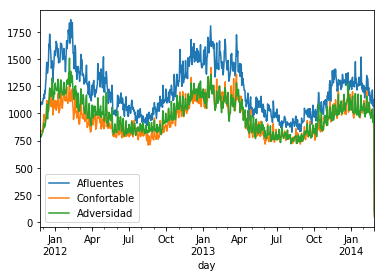

In [0]:
df.plot()

In [0]:
#LSTM Multiple Parallel Series


In [0]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [0]:
dataset[0:5]

array([[0.5340193 , 0.54538893, 0.48283448],
       [0.54287503, 0.56355146, 0.48851339],
       [0.55935199, 0.56967472, 0.49058585],
       [0.5763842 , 0.57788931, 0.48594847],
       [0.58018458, 0.57626538, 0.49959244]])

In [0]:
''' Dividing data in test and train sets '''
#dataset = df.values
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

580 249


In [0]:
# split a multivariate sequence into samples
def create_dataset(sequences, n_steps=1):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
''' Creating time frames with look backs '''
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX[0]

array([[0.5340193 , 0.54538893, 0.48283448],
       [0.54287503, 0.56355146, 0.48851339],
       [0.55935199, 0.56967472, 0.49058585],
       [0.5763842 , 0.57788931, 0.48594847],
       [0.58018458, 0.57626538, 0.49959244],
       [0.5675556 , 0.57567044, 0.49469539],
       [0.56893735, 0.5768393 , 0.51062975],
       [0.57274215, 0.5754516 , 0.51282957]])

In [0]:
trainX.shape

(572, 8, 3)

In [0]:
trainY[0]

array([0.58227603, 0.59352645, 0.5180047 ])

In [0]:
#''' Re-shaping data for model requirement '''
#trainX = np.reshape(trainX, (trainX.shape[0], 8, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 8, testX.shape[1]))

Train on 572 samples, validate on 241 samples
Epoch 1/400
 - 4s - loss: 0.3594 - val_loss: 0.0908
Epoch 2/400
 - 0s - loss: 0.0919 - val_loss: 0.0481
Epoch 3/400
 - 0s - loss: 0.0610 - val_loss: 0.0447
Epoch 4/400
 - 0s - loss: 0.0468 - val_loss: 0.0421
Epoch 5/400
 - 0s - loss: 0.0456 - val_loss: 0.0370
Epoch 6/400
 - 0s - loss: 0.0449 - val_loss: 0.0333
Epoch 7/400
 - 0s - loss: 0.0422 - val_loss: 0.0324
Epoch 8/400
 - 0s - loss: 0.0412 - val_loss: 0.0316
Epoch 9/400
 - 0s - loss: 0.0409 - val_loss: 0.0305
Epoch 10/400
 - 0s - loss: 0.0409 - val_loss: 0.0303
Epoch 11/400
 - 0s - loss: 0.0404 - val_loss: 0.0300
Epoch 12/400
 - 0s - loss: 0.0403 - val_loss: 0.0301
Epoch 13/400
 - 0s - loss: 0.0407 - val_loss: 0.0303
Epoch 14/400
 - 0s - loss: 0.0404 - val_loss: 0.0306
Epoch 15/400
 - 0s - loss: 0.0401 - val_loss: 0.0317
Epoch 16/400
 - 0s - loss: 0.0403 - val_loss: 0.0317
Epoch 17/400
 - 0s - loss: 0.0400 - val_loss: 0.0319
Epoch 18/400
 - 0s - loss: 0.0402 - val_loss: 0.0315
Epoch 19/

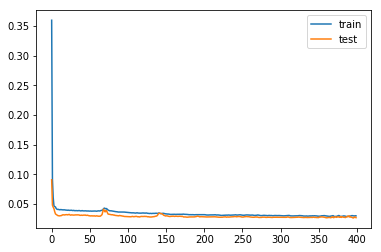

In [0]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(LSTM(units=30, return_sequences=True))
#model.add(LSTM(units=30))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=400, batch_size=50, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
yhat = model.predict(testX)

In [0]:
yhat1=yhat[:,2]

In [0]:
testY1=testY[:,2]

In [0]:
yhat.shape

(241, 3)

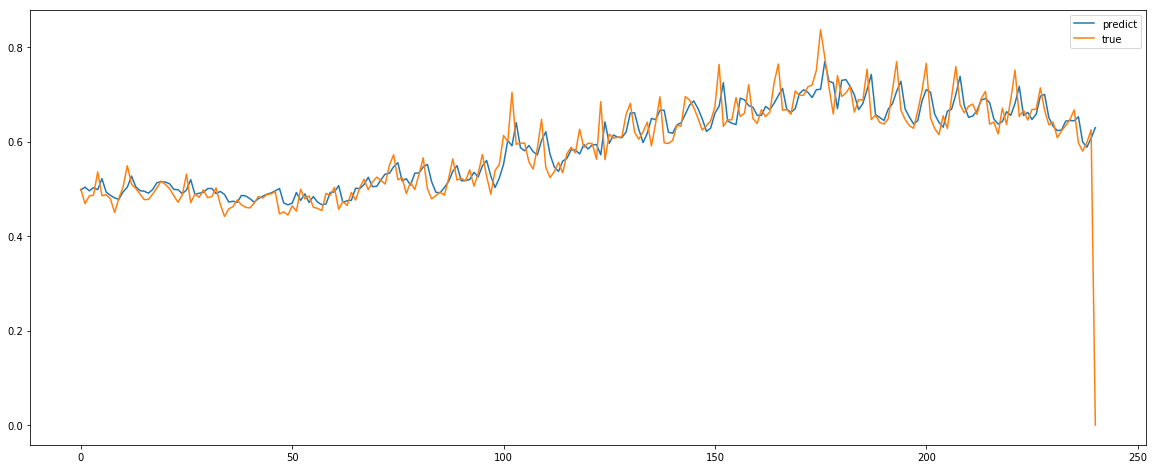

In [0]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat1[0:241], label='predict')
pyplot.plot(testY1[0:241], label='true')
pyplot.legend()
pyplot.show()

In [0]:
print("Mean squared error: %.3f" % mean_squared_error(testY, yhat))

Mean squared error: 0.003


In [0]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 0.052


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))


Variance : 0.726


In [0]:

testPredict = scaler.inverse_transform(yhat)

In [0]:

testYnormal = scaler.inverse_transform(testY)

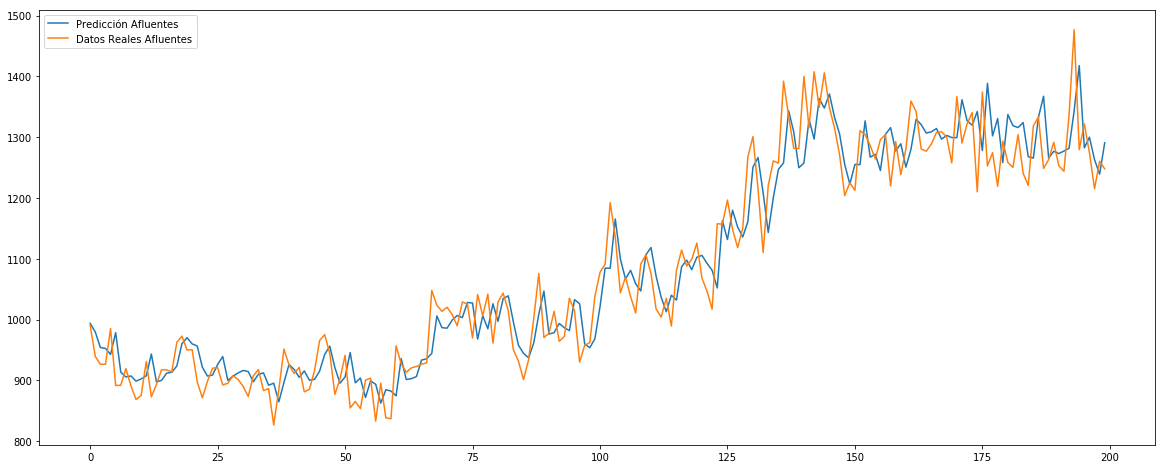

In [0]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[0:200,0], label='Predicción Afluentes')
pyplot.plot(testYnormal[0:200,0], label='Datos Reales Afluentes')
pyplot.legend()
pyplot.show()

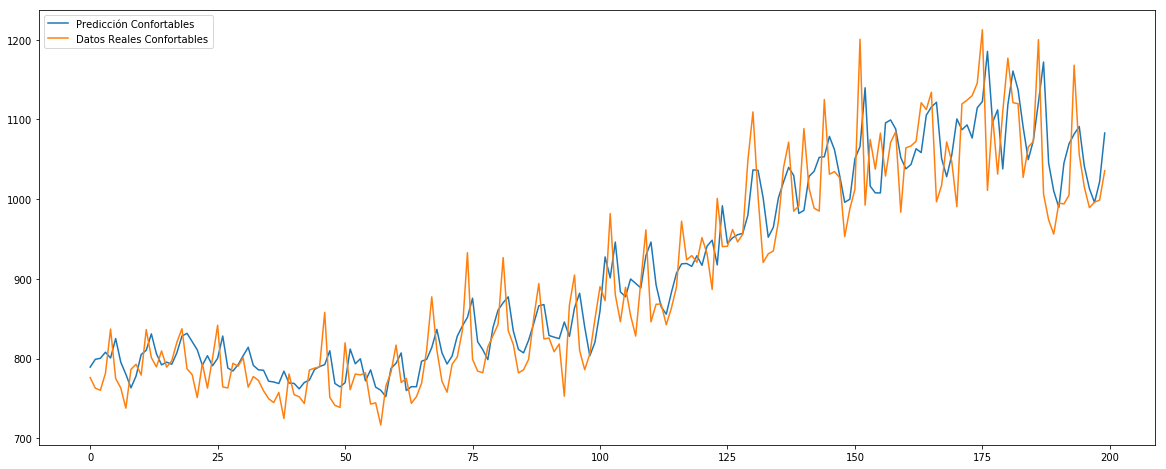

In [0]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[0:200,1], label='Predicción Confortables')
pyplot.plot(testYnormal[0:200,1], label='Datos Reales Confortables')
pyplot.legend()
pyplot.show()

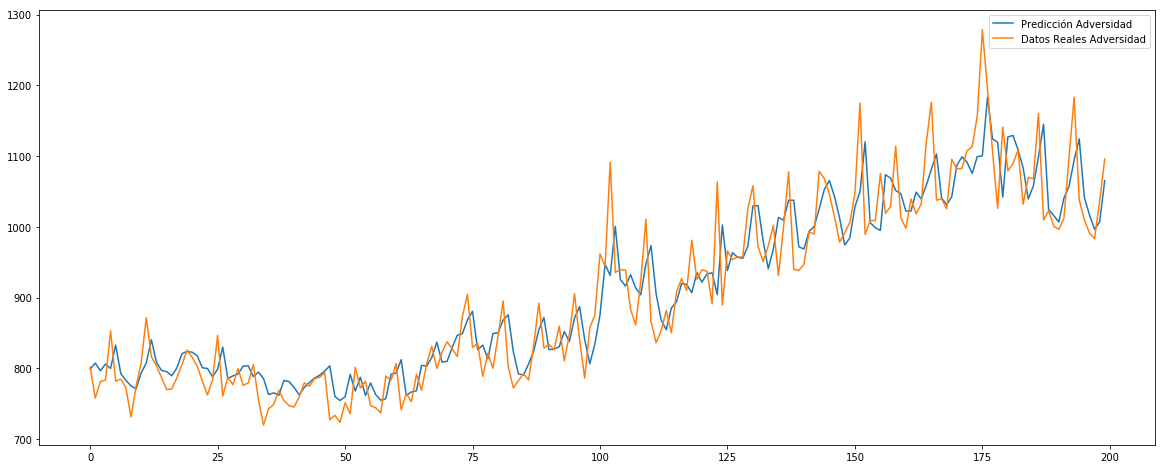

In [0]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[0:200,2], label='Predicción Adversidad')
pyplot.plot(testYnormal[0:200,2], label='Datos Reales Adversidad')
pyplot.legend()
pyplot.show()